## Stakeholder:
Out-of-state investors capitalize on student housing by purchasing properties near colleges. This is a long-term investment strategy where an investor buys property, rents it out, and holds it for 5+ years. They are attracted to less glamorous regions where home prices and rents have risen at modest rates.

## Defining Filepaths

In [ ]:
filepath_2023 = "/content/drive/MyDrive/488/Zillow-ChapelHill-Spring2023-18k-Properties.json"
filepath_0_2025 = "/content/drive/MyDrive/488/Zillow_Data_2025/Zillow-March2025-dataset_part0.json"
filepath_1_2025 = "/content/drive/MyDrive/488/Zillow_Data_2025/Zillow-March2025-dataset_part1.json"
filepath_2_2025 =  "/content/drive/MyDrive/488/Zillow_Data_2025/Zillow-March2025-dataset_part2.json"
filepath_3_2025 =  "/content/drive/MyDrive/488/Zillow_Data_2025/Zillow-March2025-dataset_part3.json"




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2023 Data Basic Cleaning & Exploration

#### Utility function for printing nested dictionaries

In [ ]:
def print_nested_dict_types(d, depth=0):
    if type(d) is dict:
      print('\n', '  '*depth,'{', sep="", end="")
      for key,value in d.items():
        print(key, end = ":")
        print_nested_dict_types(value, depth+1)
      print('}')
    elif type(d) is list:
      print('\n','  '*depth,'[', sep="", end="")
      for v in d:
        print_nested_dict_types(v, depth+1)
      print(']')
    else:
      print(type(d), d, sep=" ", end=" ")


#### Reading JSON and checking length

In [ ]:
# Load your JSON as in your notebook
import json
import pandas as pd

with open(filepath_2023) as f:
    data = json.load(f)
data.keys()
df = pd.DataFrame(data)



In [ ]:
# prompt: What are the first and last keys in data["zpid"]?

first_key = list(data["zpid"].keys())[0]
last_key = list(data["zpid"].keys())[-1]

print(f"First key: {first_key}")
print(f"Last key: {last_key}")
len(data["zpid"].keys())


First key: 0
Last key: 18286


18287

In [ ]:
Nth = 1 # change to 1 to get every house, 600 to get every 600th (~30)
dlist=dict()
dplain=dict()
dnested=dict()

# check that the second level keys are all the same, then convert to list.
keys = data["zpid"].keys()
kNth = list(keys)[::Nth]
for k,v in data.items():
  if v.keys()!=keys:
    print(k)
  elif any(type(val) is list for val in v.values()):
    dlist[k] = [v[key] for key in kNth]
  elif any(type(val) is dict for val in v.values()):
    dnested[k] = [v[key] for key in kNth]
  else:
    dplain[k] = [v[key] for key in kNth]


#### Creating df_plain dataframe

In [ ]:
df_plain = pd.DataFrame(dplain)
df_plain.columns

Index(['zpid', 'bedrooms', 'bathrooms', 'price', 'yearBuilt', 'longitude',
       'latitude', 'homeStatus', 'description', 'livingArea', 'currency',
       'homeType', 'datePostedString', 'daysOnZillow', 'zestimate',
       'rentZestimate', 'timeOnZillow', 'pageViewCount', 'favoriteCount',
       'isZillowOwned', 'isPremierBuilder', 'tourViewCount',
       'comingSoonOnMarketDate', 'timeZone', 'newConstructionType',
       'lastSoldPrice', 'contingentListingType', 'restimateLowPercent',
       'restimateHighPercent', 'brokerId', 'parcelId',
       'isPreforeclosureAuction', 'marketingName', 'priceChange', 'lotSize',
       'propertyTaxRate', 'whatILove', 'isFeatured', 'brokerageName',
       'abbreviatedAddress', 'isRecentStatusChange', 'isNonOwnerOccupied',
       'buildingId', 'rentalApplicationsAcceptedType', 'url',
       'chanceToSellFaster', 'dateSold', 'dateSoldString', 'taxAssessedValue',
       'taxAssessedYear', 'hoaFee', 'isListedByOwner', 'moveInReady',
       'moveInComple

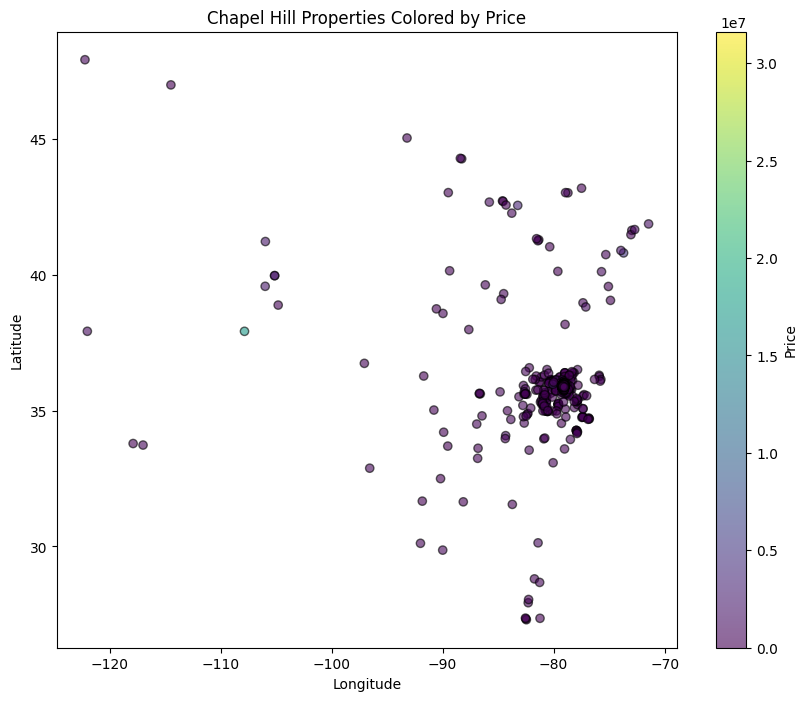

In [ ]:
import matplotlib.pyplot as plt

# Simple scatter plot of properties by longitude and latitude, colored by price
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    df_plain['longitude'],
    df_plain['latitude'],
    c=df_plain['price'],
    cmap='viridis',
    alpha=0.6,
    edgecolor='k'
)
plt.colorbar(scatter, label='Price')
plt.title('Chapel Hill Properties Colored by Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

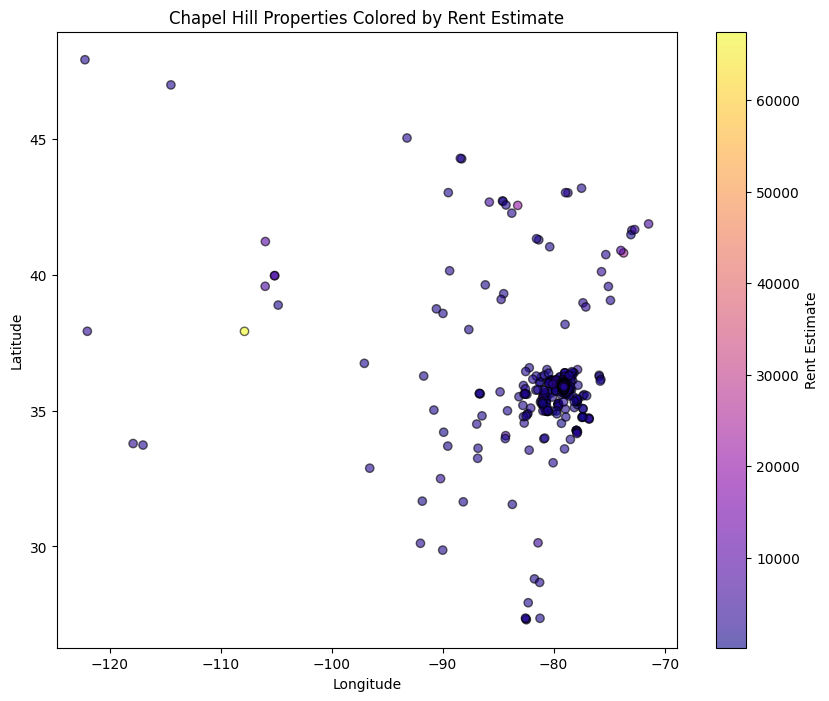

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    df_plain['longitude'],
    df_plain['latitude'],
    c=df_plain['rentZestimate'],
    cmap='plasma',
    alpha=0.6,
    edgecolor='k'
)
plt.colorbar(scatter, label='Rent Estimate')
plt.title('Chapel Hill Properties Colored by Rent Estimate')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


#### Work with nested dictionaries
For our purposes, addresses was the only relevant one, so this is what was ultimately "unpacked" and used to create df_address

In [ ]:
dnested.keys()

dict_keys(['address', 'listedBy', 'primaryPublicVideo', 'postingContact', 'listingProvider', 'building', 'tourEligibility', 'mortgageRates'])

In [ ]:
for k,v in dnested.items():
  print()
  print(k, end=":")
  print_nested_dict_types(v[0],1)


address:
  {streetAddress:<class 'str'> 2308 Ridgewood Rd city:<class 'str'> Fultondale state:<class 'str'> AL zipcode:<class 'str'> 35068 neighborhood:<class 'NoneType'> None community:<class 'NoneType'> None subdivision:<class 'NoneType'> None }

listedBy:
  {name:<class 'str'> Cindy Mars email:<class 'str'> cindymars@remax.net phone:<class 'str'> 205-966-3876 profileUrl:<class 'str'> https://www.zillow.com/profile/Cindy-Mars/ }

primaryPublicVideo:<class 'NoneType'> None 
postingContact:
  {name:<class 'str'> Cindy Mars photo:<class 'NoneType'> None }

listingProvider:<class 'NoneType'> None 
building:<class 'NoneType'> None 
tourEligibility:
  {isPropertyTourEligible:<class 'bool'> False propertyTourOptions:
    {isFinal:<class 'bool'> True tourAvailability:
      []
tourType:<class 'str'> NONE }
}

mortgageRates:<class 'NoneType'> None 

In [ ]:
# prompt: Delete the key 'tourEligibility', and its associated value, from the dict dnested
del dnested["tourEligibility"]

In [ ]:
df_address = pd.json_normalize(dnested['address'])
df_address

streetAddress          city state zipcode     neighborhood  \
0           2308 Ridgewood Rd    Fultondale    AL   35068             None   
1                122 Dixie Dr  Indianapolis    IN   46227             None   
2               19 Oakwood Dr  New Brighton    MN   55112             None   
3             260 Edgewood Rd     Asheville    NC   28804             None   
4              115 Windsor Rd     Asheville    NC   28804             None   
...                       ...           ...   ...     ...              ...   
18282     1616 Smith Level Rd   Chapel Hill    NC   27516             None   
18283          143 Vintage Dr   Chapel Hill    NC   27516  VINEYARD SQUARE   
18284  2324 Old Greensboro Rd   Chapel Hill    NC   27516             None   
18285  3604 Old Greensboro Rd   Chapel Hill    NC   27516            rural   
18286  1227 Madison Womble Rd   Chapel Hill    NC   27517             None   

      community subdivision  
0          None        None  
1          None        None  
2          None        None  
3          None        None  
4          None        None  
...         ...         ...  
18282      None        None  
18283      None        None  
18284      None        None  
18285      None        None  
18286      None        None  

[18287 rows x 7 columns]

In [ ]:
for col in ['neighborhood','community','subdivision']:
  print(col)
  print(df_address[col].value_counts(dropna=False))

neighborhood
neighborhood
None                               17869
Southern Village                      26
Meadowmont                            21
Lake Hogan Farms                      14
The Oaks                              13
                                   ...  
Blenheim Woods                         1
Chapel Hill, Lake Hogan Farm           1
Most about one acre wooded lots        1
VINEYARD SQUARE                        1
rural                                  1
Name: count, Length: 204, dtype: int64
community
community
None    18287
Name: count, dtype: int64
subdivision
subdivision
None              18282
Briar Chapel          3
Scotch Meadows        1
Morningside           1
Name: count, dtype: int64


In [ ]:
# drop neighborhood, community, and subdivision since most are "none"
df.drop(columns=['neighborhood', 'community', 'subdivision'], errors='ignore', inplace=True)


In [ ]:
df_nested = pd.concat([pd.json_normalize(x) for x in dnested.values()], axis=1)
df_nested

streetAddress          city state zipcode     neighborhood  \
0           2308 Ridgewood Rd    Fultondale    AL   35068             None   
1                122 Dixie Dr  Indianapolis    IN   46227             None   
2               19 Oakwood Dr  New Brighton    MN   55112             None   
3             260 Edgewood Rd     Asheville    NC   28804             None   
4              115 Windsor Rd     Asheville    NC   28804             None   
...                       ...           ...   ...     ...              ...   
18282     1616 Smith Level Rd   Chapel Hill    NC   27516             None   
18283          143 Vintage Dr   Chapel Hill    NC   27516  VINEYARD SQUARE   
18284  2324 Old Greensboro Rd   Chapel Hill    NC   27516             None   
18285  3604 Old Greensboro Rd   Chapel Hill    NC   27516            rural   
18286  1227 Madison Womble Rd   Chapel Hill    NC   27517             None   

      community subdivision             name                            email  \
0          None        None       Cindy Mars              cindymars@remax.net   
1          None        None      Kate Vannoy         kate@esquirerealtors.com   
2          None        None  Jason T Kraemer           jason@jasonkraemer.com   
3          None        None             None                             None   
4          None        None     Matt Tavener  sellers@TheMattAndMollyTeam.com   
...         ...         ...              ...                              ...   
18282      None        None             None                             None   
18283      None        None             None                             None   
18284      None        None             None                             None   
18285      None        None             None                             None   
18286      None        None             None                             None   

              phone  ... postingWebsiteURL postingWebsiteLinkText  \
0      205-966-3876  ...               NaN                    NaN   
1              None  ...               NaN                    NaN   
2      612-308-8574  ...               NaN                    NaN   
3              None  ...              None    See listing website   
4      828-210-1697  ...               NaN                    NaN   
...             ...  ...               ...                    ...   
18282          None  ...               NaN                    NaN   
18283          None  ...               NaN                    NaN   
18284          None  ...               NaN                    NaN   
18285          None  ...               NaN                    NaN   
18286          None  ...               NaN                    NaN   

      postingGroupName sourceText  isZRMSourceText  buildingName  bdpUrl  \
0                  NaN        NaN              NaN           NaN     NaN   
1                  NaN        NaN              NaN           NaN     NaN   
2                  NaN        NaN              NaN           NaN     NaN   
3                 None       None              NaN           NaN     NaN   
4                  NaN        NaN              NaN           NaN     NaN   
...                ...        ...              ...           ...     ...   
18282              NaN        NaN              NaN           NaN     NaN   
18283              NaN        NaN              NaN           NaN     NaN   
18284              NaN        NaN              NaN           NaN     NaN   
18285              NaN        NaN              NaN           NaN     NaN   
18286              NaN        NaN              NaN           NaN     NaN   

       streetAddress rentalUnitsSummary.unitCount thirtyYearFixedRate  
0                NaN                          NaN                 NaN  
1                NaN                          NaN                 NaN  
2                NaN                          NaN                 NaN  
3                NaN                          NaN                 NaN  
4   

#### Combining df_plain (non-nested) with df_nested to make one df_zillow_2023 dataframe

In [ ]:
# combine df_plain and df_nested
df_zillow_2023 = pd.concat([df_plain, df_nested],axis=1)
df_zillow_2023

zpid  bedrooms  bathrooms   price  yearBuilt  longitude  \
0          914857       4.0        2.0  230000     1961.0 -86.810970   
1         1176855       3.0        2.0  210000     1962.0 -86.156540   
2         2143678       4.0        2.0  365000     1962.0 -93.210335   
3         5614449       2.0        1.0  484600     1975.0 -82.560425   
4         5642139       4.0        3.0  680000     1951.0 -82.552260   
...           ...       ...        ...     ...        ...        ...   
18282  2146664539       2.0        1.0  493500     1972.0 -79.081690   
18283  2146679060       3.0        3.5  460400     2005.0 -79.065170   
18284  2146717334       4.0        4.0  951400        NaN -79.147964   
18285  2146830418       4.0        2.0       0     1969.0 -79.170494   
18286  2146933695       3.0        2.5  470300     2005.0 -79.039500   

        latitude     homeStatus  \
0      33.618390  RECENTLY_SOLD   
1      39.637882  RECENTLY_SOLD   
2      45.049557           SOLD   
3      35.620270          OTHER   
4      35.637710           SOLD   
...          ...            ...   
18282  35.865063          OTHER   
18283  35.954940          OTHER   
18284  35.901913          OTHER   
18285  35.896526          OTHER   
18286  35.870530          OTHER   

                                             description  livingArea  ...  \
0      This home has been lovingly cared for and main...      2475.0  ...   
1      Great, one owner ranch now on the market!  Rea...      2541.0  ...   
2      Welcome to this completely updated mid-century...      2017.0  ...   
3      Open House on Sunday, June 10th from 2pm to 4p...       850.0  ...   
4      Immaculate golf course home located on the 8th...      2582.0  ...   
...                                                  ...         ...  ...   
18282  APPEALING INVESTMENT COMPLEX! Property has 2 a...      4040.0  ...   
18283  $10,000 CASH BACK W/ NO AGENT!!!! LARGE DECK O...      2137.0  ...   
18284  Stately brick home on almost 11 acres in Orang...      3834.0  ...   
18285  New kitchen, new ceramic tile flooring, hardwo...      2222.0  ...   
18286  Beautiful country setting 5 miles from UNC Cam...      1730.0  ...   

      postingWebsiteURL postingWebsiteLinkText postingGroupName  sourceText  \
0                   NaN                    NaN              NaN         NaN   
1                   NaN                    NaN              NaN         NaN   
2                   NaN                    NaN              NaN         NaN   
3                  None    See listing website             None        None   
4                   NaN                    NaN              NaN         NaN   
...                 ...                    ...              ...         ...   
18282               NaN                    NaN              NaN         NaN   
18283               NaN                    NaN              NaN         NaN   
18284               NaN                    NaN              NaN         NaN   
18285               NaN                    NaN              NaN         NaN   
18286               NaN                    NaN              NaN         NaN   

       isZRMSourceText  buildingName bdpUrl  streetAddress  \
0                  NaN           NaN    NaN            NaN   
1                  NaN           NaN    NaN            NaN   
2                  NaN           NaN    NaN            NaN   
3                  NaN           NaN    NaN            NaN   
4                  NaN           NaN    NaN            NaN   
...                ...           ...    ...            ...   
18282              NaN           NaN    NaN            NaN   
18283              NaN           NaN    NaN            NaN   
18284              NaN           NaN    NaN            NaN   
18285              NaN           NaN    NaN            NaN   
18286              NaN           NaN    NaN            NaN   

       rentalUnitsSummary.unitCount  thirtyYearFixedRate  
0                               NaN              

In [ ]:
df_zillow_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18287 entries, 0 to 18286
Data columns (total 94 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   zpid                            18287 non-null  int64  
 1   bedrooms                        16452 non-null  float64
 2   bathrooms                       17370 non-null  float64
 3   price                           18287 non-null  int64  
 4   yearBuilt                       17137 non-null  float64
 5   longitude                       18284 non-null  float64
 6   latitude                        18284 non-null  float64
 7   homeStatus                      18287 non-null  object 
 8   description                     18287 non-null  object 
 9   livingArea                      17359 non-null  float64
 10  currency                        18287 non-null  object 
 11  homeType                        18287 non-null  object 
 12  datePostedString                

#### Basic cleaning of df_zillow_2023
Included dropping columns that are all null, checking for null values and handling relevant missing information.

In [ ]:
# prompt: drop columns that are all null from dataframe df_zillow
df_zillow_2023.dropna(axis=1, how='all', inplace=True)
print(df_zillow_2023.shape)
df_zillow_2023

(18287, 86)


zpid  bedrooms  bathrooms   price  yearBuilt  longitude  \
0          914857       4.0        2.0  230000     1961.0 -86.810970   
1         1176855       3.0        2.0  210000     1962.0 -86.156540   
2         2143678       4.0        2.0  365000     1962.0 -93.210335   
3         5614449       2.0        1.0  484600     1975.0 -82.560425   
4         5642139       4.0        3.0  680000     1951.0 -82.552260   
...           ...       ...        ...     ...        ...        ...   
18282  2146664539       2.0        1.0  493500     1972.0 -79.081690   
18283  2146679060       3.0        3.5  460400     2005.0 -79.065170   
18284  2146717334       4.0        4.0  951400        NaN -79.147964   
18285  2146830418       4.0        2.0       0     1969.0 -79.170494   
18286  2146933695       3.0        2.5  470300     2005.0 -79.039500   

        latitude     homeStatus  \
0      33.618390  RECENTLY_SOLD   
1      39.637882  RECENTLY_SOLD   
2      45.049557           SOLD   
3      35.620270          OTHER   
4      35.637710           SOLD   
...          ...            ...   
18282  35.865063          OTHER   
18283  35.954940          OTHER   
18284  35.901913          OTHER   
18285  35.896526          OTHER   
18286  35.870530          OTHER   

                                             description  livingArea  ...  \
0      This home has been lovingly cared for and main...      2475.0  ...   
1      Great, one owner ranch now on the market!  Rea...      2541.0  ...   
2      Welcome to this completely updated mid-century...      2017.0  ...   
3      Open House on Sunday, June 10th from 2pm to 4p...       850.0  ...   
4      Immaculate golf course home located on the 8th...      2582.0  ...   
...                                                  ...         ...  ...   
18282  APPEALING INVESTMENT COMPLEX! Property has 2 a...      4040.0  ...   
18283  $10,000 CASH BACK W/ NO AGENT!!!! LARGE DECK O...      2137.0  ...   
18284  Stately brick home on almost 11 acres in Orang...      3834.0  ...   
18285  New kitchen, new ceramic tile flooring, hardwo...      2222.0  ...   
18286  Beautiful country setting 5 miles from UNC Cam...      1730.0  ...   

      agentLicenseNumber postingWebsiteURL postingWebsiteLinkText  \
0                    NaN               NaN                    NaN   
1                    NaN               NaN                    NaN   
2                    NaN               NaN                    NaN   
3                   None              None    See listing website   
4                    NaN               NaN                    NaN   
...                  ...               ...                    ...   
18282                NaN               NaN                    NaN   
18283                NaN               NaN                    NaN   
18284                NaN               NaN                    NaN   
18285                NaN               NaN                    NaN   
18286                NaN               NaN                    NaN   

       postingGroupName  sourceText  buildingName bdpUrl  streetAddress  \
0                   NaN         NaN           NaN    NaN            NaN   
1                   NaN         NaN           NaN    NaN            NaN   
2                   NaN         NaN           NaN    NaN            NaN   
3                  None        None           NaN    NaN            NaN   
4                   NaN         NaN           NaN    NaN            NaN   
...                 ...         ...           ...    ...            ...   
18282               NaN         NaN           NaN    NaN            NaN   
18283               NaN         NaN           NaN    NaN            NaN   
18284               NaN         NaN           NaN    NaN            NaN   
18285               NaN         NaN           NaN    NaN            NaN   
18286               NaN         NaN           NaN    NaN            NaN   

       rentalUnitsSummary.unitCount  thirtyYearFixedRate  
0            

In [ ]:
# Check for remaining missing values in the dataset
print(df_zillow_2023.isnull().sum())


zpid                                0
bedrooms                         1835
bathrooms                         917
price                               0
yearBuilt                        1150
                                ...  
buildingName                    18265
bdpUrl                          18265
streetAddress                   18268
rentalUnitsSummary.unitCount    18268
thirtyYearFixedRate              2827
Length: 86, dtype: int64


If we were to drop rows where any data is missing, we could drop more than 10% of the rows, so that's not really viable. Instead, we changed missing bedroom values to the mode since this number tends to cluster around 3-5 and bathrooms and yearBuilt to the median. We dropped 447 rows with missing rent Zestimates, prices, longitudes, and latitudes since these are crucial parts of our data with respect to an investor's interests in renting to students.

In [ ]:
# How many rows would be dropped if we dropped rows missing bedrooms, bathrooms, yearBuilt, or rentZestimate?
df_zillow_2023[['bedrooms', 'bathrooms', 'yearBuilt', 'rentZestimate']].isnull().any(axis=1).sum()

#Change bedrooms to mode (tend to cluster around 3-5 so this makes sense) and bathrooms and yearBuilt to median:
# Impute bedrooms, bathrooms, yearBuilt
for col in ['bedrooms', 'bathrooms', 'yearBuilt']:
    if col == 'bedrooms':
        fill_value = df_zillow_2023[col].mode().iloc[0]
        df_zillow_2023[col] = df_zillow_2023[col].fillna(fill_value).astype('Int64')  # bedrooms should be integer
    elif col == 'yearBuilt':
        fill_value = df_zillow_2023[col].median()
        df_zillow_2023[col] = df_zillow_2023[col].fillna(fill_value).astype('Int64')  # yearBuilt should be integer
    else:  # bathrooms
        fill_value = df_zillow_2023[col].median()
        df_zillow_2023[col] = df_zillow_2023[col].fillna(fill_value)  # bathrooms stays float!

#drop those with missing crucial info
before_drop = df_zillow_2023.shape[0]
# Drop rows missing price, rentZestimate, latitude, or longitude
df_zillow_2023 = df_zillow_2023.dropna(subset=['price', 'rentZestimate', 'latitude', 'longitude'])

after_drop = df_zillow_2023.shape[0]
print(f"Dropped {before_drop - after_drop} rows due to missing rentZestimate, price, latitude, or longitude.")

Dropped 447 rows due to missing rentZestimate, price, latitude, or longitude.


Also dropping properties with 0 or negative prices, and excluding lots, manufactured homes, and unknown home types. 806 properties were removed because of this.

In [ ]:
# Check original shape
original_count = df_zillow_2023.shape[0]
print(f"Original number of properties: {original_count}")

# Rows with zero or negative price
bad_price_count = (df_zillow_2023['price'] <= 0).sum()
print(f"Properties with zero or negative price: {bad_price_count}")

# Rows with undesirable home types
exclude_types = ['LOT', 'MANUFACTURED', 'HOME_TYPE_UNKNOWN']
bad_home_type_count = df_zillow_2023['homeType'].isin(exclude_types).sum()
print(f"Properties with excluded home types: {bad_home_type_count}")

# Combine both conditions just for info (optional)
both_conditions = df_zillow_2023[
    (df_zillow_2023['price'] <= 0) |
    (df_zillow_2023['homeType'].isin(exclude_types))
].shape[0]
print(f"Properties matching either bad price OR bad home type: {both_conditions}")

# ✅ Now apply the filtering only after checking:
df_zillow_2023 = df_zillow_2023[df_zillow_2023['price'] > 0]
df_zillow_2023 = df_zillow_2023[~df_zillow_2023['homeType'].isin(exclude_types)]

# Confirm how much data remains
final_count = df_zillow_2023.shape[0]
print(f"Final number of properties after filtering: {final_count}")
print(f"Total rows removed: {original_count - final_count}")

Original number of properties: 17840
Properties with zero or negative price: 385
Properties with excluded home types: 501
Properties matching either bad price OR bad home type: 806
Final number of properties after filtering: 17034
Total rows removed: 806


#### Keeping relevant columns

In [ ]:
keep_columns_2023 = [
    'zpid',                  # Unique ID
    'bedrooms',              # Capacity
    'bathrooms',             # Capacity
    'price',                 # Sale price
    'yearBuilt',             # Age of property
    'longitude', 'latitude', # Location
    'homeType',              # Property type (single_family, condo, etc.)
    'livingArea',            # Size (square footage)
    'rentZestimate',         # Critical for rent yield
    'zestimate',             # Zestimate (optional price estimate)
    'lotSize',               # Outdoor space
    'propertyTaxRate',       # Cost factor
    'hoaFee',                # Cost factor
    'daysOnZillow',          # Market demand indicator
    'pageViewCount',         # Market demand indicator
    'favoriteCount',         # Market demand indicator
    'homeStatus',            # Status of listing (for filtering active listings)
    'isZillowOwned',         # Flag for ownership type
    'isPremierBuilder',      # New construction/builder listing flag
    'isNonOwnerOccupied',    # Important for investor focus (non-owner-occupied = rental)
    'isListedByOwner',       # FSBO flag (may or may not be of interest)
    'streetAddress',         # Street address
    'city',                  # City
    'state',                 # State
    'zipcode',               # Zip code
    'abbreviatedAddress',    # Easy-to-read address field
    'datePostedString',      # How recent the listing is
    'lastSoldPrice',         # Sale history (optional)
    'dateSoldString',        # Sale history (optional)
    'url'                    # Link to listing (for reference/checking)
]

df_zillow_2023_filtered = df_zillow_2023[keep_columns_2023].copy()

print(f"Filtered 2023 data shape: {df_zillow_2023_filtered.shape}")
df_zillow_2023_filtered.head()

Filtered 2023 data shape: (17034, 33)


zpid  bedrooms  bathrooms   price  yearBuilt  longitude   latitude  \
0   914857         4        2.0  230000       1961 -86.810970  33.618390   
1  1176855         3        2.0  210000       1962 -86.156540  39.637882   
2  2143678         4        2.0  365000       1962 -93.210335  45.049557   
3  5614449         2        1.0  484600       1975 -82.560425  35.620270   
4  5642139         4        3.0  680000       1951 -82.552260  35.637710   

        homeType  livingArea  rentZestimate  ...      streetAddress  \
0  SINGLE_FAMILY      2475.0         1345.0  ...  2308 Ridgewood Rd   
1  SINGLE_FAMILY      2541.0         1479.0  ...       122 Dixie Dr   
2  SINGLE_FAMILY      2017.0         2495.0  ...      19 Oakwood Dr   
3  SINGLE_FAMILY       850.0         1749.0  ...    260 Edgewood Rd   
4  SINGLE_FAMILY      2582.0         5063.0  ...     115 Windsor Rd   

   streetAddress          city  state  zipcode  abbreviatedAddress  \
0            NaN    Fultondale     AL    35068   2308 Ridgewood Rd   
1            NaN  Indianapolis     IN    46227        122 Dixie Dr   
2            NaN  New Brighton     MN    55112       19 Oakwood Dr   
3            NaN     Asheville     NC    28804     260 Edgewood Rd   
4            NaN     Asheville     NC    28804      115 Windsor Rd   

   datePostedString lastSoldPrice  dateSoldString  \
0        2022-11-22      230000.0            None   
1        2022-06-13      210000.0            None   
2        2020-12-23      365000.0            None   
3                        255000.0            None   
4        2020-12-20      680000.0            None   

                                                 url  
0  https://www.zillow.com/homedetails/2308-Ridgew...  
1  https://www.zillow.com/homedetails/122-Dixie-D...  
2  https://www.zillow.com/homedetails/19-Oakwood-...  
3  https://www.zillow.com/homedetails/260-Edgewoo...  
4  https://www.zillow.com/homedetails/115-Windsor...  

[5 rows x 33 columns]

# 2025 Data Basic Cleaning & Exploration

#### Loading each JSON
Each JSON is loaded seperately and filtered for only the relevant columns which are the same as the filtered 2023 data(necessary because the Runtime kept crashing). The columns and shape of each part were previously checked for inconsistencies.

In [ ]:
keep_columns_2025 = [
    'zpid', 'bedrooms', 'bathrooms', 'price', 'yearBuilt',
    'longitude', 'latitude', 'homeType', 'livingArea',
    'rentZestimate', 'zestimate', 'lotSize', 'propertyTaxRate',
    'hoaFee', 'daysOnZillow', 'pageViewCount', 'favoriteCount',
    'homeStatus', 'isZillowOwned', 'isPremierBuilder',
    'isNonOwnerOccupied', 'isListedByOwner', 'abbreviatedAddress',
    'datePostedString', 'lastSoldPrice', 'dateSoldString', 'url','city',
    'state',
    'zipcode'
]
# function to load and filter json at one time to preserve RAM usage
def load_and_filter_json(filepath, keep_columns):
    # Open and load the JSON file (list of dicts)
    with open(filepath, 'r') as f:
        data = json.load(f)

    # Turn into DataFrame
    df = pd.DataFrame(data)

    # Filter to keep only the relevant columns (ignore missing columns safely)
    df = df.reindex(columns=keep_columns)  # Will add NaN for missing cols, won't crash

    return df



In [ ]:
# Load and filter part 0
df_part0 = load_and_filter_json(filepath_0_2025, keep_columns_2025)
print(f"Loaded part 0 with shape: {df_part0.shape}")

Loaded part 0 with shape: (467, 30)


In [ ]:
# Load and filter part 1
df_part1 = load_and_filter_json(filepath_1_2025, keep_columns_2025)
print(f"Loaded part 1 with shape: {df_part1.shape}")

Loaded part 1 with shape: (11373, 30)


In [ ]:
# Load and filter part 2
df_part2 = load_and_filter_json(filepath_2_2025, keep_columns_2025)
print(f"Loaded part 2 with shape: {df_part2.shape}")

Loaded part 2 with shape: (7329, 30)


In [ ]:
# Load and filter part 3
df_part3 = load_and_filter_json(filepath_3_2025, keep_columns_2025)
print(f"Loaded part 3 with shape: {df_part3.shape}")

Loaded part 3 with shape: (12864, 30)


In [ ]:
# Checking that filtering was done properly and all columns are the same

print(set(df_part0.columns))
print(set(df_part1.columns))
print(set(df_part2.columns))
print(set(df_part3.columns))

# Optional: Check if any columns are mismatched
print("Part 0 not in Part 1:", set(df_part0.columns) - set(df_part1.columns))
print("Part 1 not in Part 0:", set(df_part1.columns) - set(df_part0.columns))
print("Part 0 not in Part 2:", set(df_part0.columns) - set(df_part2.columns))
print("Part 2 not in Part 0:", set(df_part2.columns) - set(df_part0.columns))
print("Part 0 not in Part 3:", set(df_part0.columns) - set(df_part3.columns))
print("Part 3 not in Part 0:", set(df_part3.columns) - set(df_part0.columns))
print("Part 1 not in Part 2:", set(df_part1.columns) - set(df_part2.columns))
print("Part 2 not in Part 1:", set(df_part2.columns) - set(df_part1.columns))
print("Part 1 not in Part 3:", set(df_part1.columns) - set(df_part3.columns))
print("Part 3 not in Part 1:", set(df_part3.columns) - set(df_part1.columns))
print("Part 2 not in Part 3:", set(df_part2.columns) - set(df_part3.columns))
print("Part 3 not in Part 2:", set(df_part3.columns) - set(df_part2.columns))


{'isListedByOwner', 'isNonOwnerOccupied', 'yearBuilt', 'state', 'homeType', 'url', 'zestimate', 'price', 'lotSize', 'zipcode', 'favoriteCount', 'zpid', 'lastSoldPrice', 'city', 'abbreviatedAddress', 'livingArea', 'hoaFee', 'datePostedString', 'longitude', 'propertyTaxRate', 'isZillowOwned', 'bedrooms', 'rentZestimate', 'daysOnZillow', 'pageViewCount', 'bathrooms', 'homeStatus', 'isPremierBuilder', 'latitude', 'dateSoldString'}
{'isListedByOwner', 'isNonOwnerOccupied', 'yearBuilt', 'state', 'homeType', 'url', 'zestimate', 'price', 'lotSize', 'zipcode', 'favoriteCount', 'zpid', 'lastSoldPrice', 'city', 'abbreviatedAddress', 'livingArea', 'hoaFee', 'datePostedString', 'longitude', 'propertyTaxRate', 'isZillowOwned', 'bedrooms', 'rentZestimate', 'daysOnZillow', 'pageViewCount', 'bathrooms', 'homeStatus', 'isPremierBuilder', 'latitude', 'dateSoldString'}
{'isListedByOwner', 'isNonOwnerOccupied', 'yearBuilt', 'state', 'homeType', 'url', 'zestimate', 'price', 'lotSize', 'zipcode', 'favoriteCo

#### Combining all column-filtered partial dataframes into one df_zillow_2025 dataframe

In [ ]:
df_zillow_2025 = pd.concat([df_part0, df_part1, df_part2, df_part3], ignore_index=True)

print(f"Combined 2025 data shape: {df_zillow_2025.shape}")
df_zillow_2025.head()


Combined 2025 data shape: (32033, 30)


zpid  bedrooms  bathrooms   price  yearBuilt  longitude   latitude  \
0   50032766.0       5.0        2.5  764100     1991.0 -79.077890  35.897522   
1   50037322.0       8.0        6.0  829100     1927.0 -79.057396  35.907510   
2  251696953.0       4.0        3.5  965600     1997.0 -79.143480  35.960842   
3  251557517.0       4.0        2.0  453400     1992.0 -79.179276  35.894210   
4   50037263.0       2.0        1.0  701600     1942.0 -79.057724  35.906284   

        homeType  livingArea  rentZestimate  ...  isNonOwnerOccupied  \
0  SINGLE_FAMILY      3013.0         2491.0  ...               False   
1      APARTMENT      3217.0         4858.0  ...               False   
2  SINGLE_FAMILY      3009.0         3576.0  ...               False   
3  SINGLE_FAMILY      1658.0         2374.0  ...               False   
4      APARTMENT      1120.0         1501.0  ...               False   

   isListedByOwner         abbreviatedAddress  datePostedString  \
0              NaN         302 Orchard Ln #92               NaN   
1              NaN     232 McCauley St UNIT A               NaN   
2              NaN      2034 Foxwood Farm Trl               NaN   
3              NaN  1509 Partridgeberry Rd #A               NaN   
4              NaN              308 Ransom St               NaN   

   lastSoldPrice  dateSoldString  url         city  state  zipcode  
0       441000.0      1991-09-27  NaN     Carrboro     NC    27510  
1       547500.0      2007-04-05  NaN  Chapel Hill     NC    27516  
2            NaN                  NaN  Chapel Hill     NC    27516  
3            NaN                  NaN  Chapel Hill     NC    27516  
4       725000.0      2016-08-04  NaN  Chapel Hill     NC    27516  

[5 rows x 30 columns]

#### Checking address for nested dictionary

In [ ]:
print(df_zillow_2025.columns)


Index(['zpid', 'bedrooms', 'bathrooms', 'price', 'yearBuilt', 'longitude',
       'latitude', 'homeType', 'livingArea', 'rentZestimate', 'zestimate',
       'lotSize', 'propertyTaxRate', 'hoaFee', 'daysOnZillow', 'pageViewCount',
       'favoriteCount', 'homeStatus', 'isZillowOwned', 'isPremierBuilder',
       'isNonOwnerOccupied', 'isListedByOwner', 'abbreviatedAddress',
       'datePostedString', 'lastSoldPrice', 'dateSoldString', 'url', 'city',
       'state', 'zipcode'],
      dtype='object')


##### The address fields are already seperated into their own columns

In [ ]:
df_zillow_2025['abbreviatedAddress'].head(10)


0           302 Orchard Ln #92
1       232 McCauley St UNIT A
2        2034 Foxwood Farm Trl
3    1509 Partridgeberry Rd #A
4                308 Ransom St
5           298 Summerwalk Cir
6              104 Overlook Pt
7            101 Nottingham Dr
8           201 McGregor Dr #A
9       101 Orchard Ln UNIT 19
Name: abbreviatedAddress, dtype: object

In [ ]:
df_zillow_2025['zipcode'].head(10)

0    27510
1    27516
2    27516
3    27516
4    27516
5    27517
6    27514
7    27517
8    27514
9    27514
Name: zipcode, dtype: object

In [ ]:
df_zillow_2025['city'].head(10)

0       Carrboro
1    Chapel Hill
2    Chapel Hill
3    Chapel Hill
4    Chapel Hill
5    Chapel Hill
6    Chapel Hill
7    Chapel Hill
8    Chapel Hill
9    Chapel Hill
Name: city, dtype: object

In [ ]:
df_zillow_2025['state'].head(10)

0    NC
1    NC
2    NC
3    NC
4    NC
5    NC
6    NC
7    NC
8    NC
9    NC
Name: state, dtype: object

#### Basic cleaning

In [ ]:
# prompt: drop columns that are all null from dataframe df_zillow
df_zillow_2025.dropna(axis=1, how='all', inplace=True)
print(df_zillow_2025.shape)
df_zillow_2025

(32033, 29)


zpid  bedrooms  bathrooms   price  yearBuilt  longitude  \
0      5.003277e+07       5.0        2.5  764100     1991.0 -79.077890   
1      5.003732e+07       8.0        6.0  829100     1927.0 -79.057396   
2      2.516970e+08       4.0        3.5  965600     1997.0 -79.143480   
3      2.515575e+08       4.0        2.0  453400     1992.0 -79.179276   
4      5.003726e+07       2.0        1.0  701600     1942.0 -79.057724   
...             ...       ...        ...     ...        ...        ...   
32028  5.005028e+07       3.0        2.5  788700     1986.0 -79.037460   
32029  2.443852e+08       3.0        3.0  549900     2016.0 -79.108700   
32030  3.041585e+08       NaN        NaN  433500     1980.0 -79.019264   
32031  5.003841e+07       4.0        3.0  679700     1947.0 -79.036310   
32032  2.055476e+09       2.0        2.5  419400     2002.0 -79.003020   

        latitude       homeType  livingArea  rentZestimate  ...  \
0      35.897522  SINGLE_FAMILY      3013.0         2491.0  ...   
1      35.907510      APARTMENT      3217.0         4858.0  ...   
2      35.960842  SINGLE_FAMILY      3009.0         3576.0  ...   
3      35.894210  SINGLE_FAMILY      1658.0         2374.0  ...   
4      35.906284      APARTMENT      1120.0         1501.0  ...   
...          ...            ...         ...            ...  ...   
32028  35.952420  SINGLE_FAMILY      3240.0         3904.0  ...   
32029  35.821045  SINGLE_FAMILY      2098.0         2775.0  ...   
32030  35.949894  SINGLE_FAMILY      4140.0         3079.0  ...   
32031  35.919440   MULTI_FAMILY      1879.0         2419.0  ...   
32032  35.940235      TOWNHOUSE      1748.0         2109.0  ...   

       isPremierBuilder  isNonOwnerOccupied  isListedByOwner  \
0                 False               False              NaN   
1                 False               False              NaN   
2                 False               False              NaN   
3                 False               False              NaN   
4                 False               False              NaN   
...                 ...                 ...              ...   
32028             False               False              NaN   
32029             False               False              NaN   
32030             False               False              NaN   
32031             False               False              NaN   
32032             False               False              NaN   

              abbreviatedAddress  datePostedString  lastSoldPrice  \
0             302 Orchard Ln #92               NaN       441000.0   
1         232 McCauley St UNIT A               NaN       547500.0   
2          2034 Foxwood Farm Trl               NaN            NaN   
3      1509 Partridgeberry Rd #A               NaN            NaN   
4                  308 Ransom St               NaN       725000.0   
...                          ...               ...            ...   
32028             807 Kenmore Rd               NaN        44000.0   
32029       195 Old Piedmont Cir               NaN       372000.0   
32030        114 Weaver Dairy Rd               NaN       433500.0   
32031               46 Davie Cir               NaN       435000.0   
32032       317 Charleston Ln #1               NaN            NaN   

       dateSoldString         city  state  zipcode  
0          1991-09-27     Carrboro     NC    27510  
1          2007-04-05  Chapel Hill     NC    27516  
2                      Chapel Hill     NC    27516  
3                      Chapel Hill     NC    27516  
4          2016-08-04  Chapel Hill     NC    27516  
...               ...          ...    ...      ...  
32028      1985-01-16  Chapel Hill     NC    27514  
32029      2020-06-12  Chapel Hill     NC    27516  
32030      2024-07-30  Chapel Hill     NC    27514  
32031      2018-05-16  Chapel Hill     NC    27514  
32032                  Chapel Hill     NC    27517  

[32033 rows x 29 columns]

In [ ]:
# Check for remaining missing values in the dataset
print(df_zillow_2025.isnull().sum())


zpid                     54
bedrooms               3890
bathrooms              3372
price                     0
yearBuilt              4614
longitude                66
latitude                 66
homeType                  0
livingArea             3432
rentZestimate          1336
zestimate              4508
lotSize                4876
propertyTaxRate         434
hoaFee                24925
daysOnZillow           8171
pageViewCount         31627
favoriteCount         31627
homeStatus                0
isZillowOwned             0
isPremierBuilder          0
isNonOwnerOccupied        0
isListedByOwner       31674
abbreviatedAddress        0
datePostedString      31627
lastSoldPrice          8861
dateSoldString          765
city                     54
state                    54
zipcode                  55
dtype: int64


Once again, we changed missing bedroom values to the mode since this number tends to cluster around 3-5 and bathrooms and yearBuilt to the median. We dropped 1336 rows with missing rent Zestimates, prices, longitudes, and latitudes since these are crucial parts of our data with respect to an investor's interests in renting to students.

In [ ]:
# How many rows would be dropped if we dropped rows missing bedrooms, bathrooms, yearBuilt, or rentZestimate?
df_zillow_2025[['bedrooms', 'bathrooms', 'yearBuilt', 'rentZestimate']].isnull().any(axis=1).sum()

#Change bedrooms to mode (tend to cluster around 3-5 so this makes sense) and bathrooms and yearBuilt to median:
# Impute bedrooms, bathrooms, yearBuilt
for col in ['bedrooms', 'bathrooms', 'yearBuilt']:
    if col == 'bedrooms':
        fill_value = df_zillow_2025[col].mode().iloc[0]
        df_zillow_2025[col] = df_zillow_2025[col].fillna(fill_value).astype('Int64')  # bedrooms should be integer
    elif col == 'yearBuilt':
        fill_value = df_zillow_2025[col].median()
        df_zillow_2025[col] = df_zillow_2025[col].fillna(fill_value).astype('Int64')  # yearBuilt should be integer
    else:  # bathrooms
        fill_value = df_zillow_2025[col].median()
        df_zillow_2025[col] = df_zillow_2025[col].fillna(fill_value)  # bathrooms stays float!

#drop those with missing crucial info
before_drop = df_zillow_2025.shape[0]
# Drop rows missing price, rentZestimate, latitude, or longitude
df_zillow_2025 = df_zillow_2025.dropna(subset=['price', 'rentZestimate', 'latitude', 'longitude'])

after_drop = df_zillow_2025.shape[0]
print(f"Dropped {before_drop - after_drop} rows due to missing rentZestimate, price, latitude, or longitude.")



Dropped 1348 rows due to missing rentZestimate, price, latitude, or longitude.


Also dropping properties with 0 or negative prices, and excluding lots, manufactured homes, and unknown home types. 2952 properties were removed because of this.

In [ ]:
# Check original shape
original_count_2025 = df_zillow_2025.shape[0]
print(f"Original number of properties (2025): {original_count_2025}")

# Check how many have zero or negative price
bad_price_count_2025 = (df_zillow_2025['price'] <= 0).sum()
print(f"Properties with zero or negative price (2025): {bad_price_count_2025}")

# Check how many are in the excluded home types
exclude_types = ['LOT', 'MANUFACTURED', 'HOME_TYPE_UNKNOWN']
bad_home_type_count_2025 = df_zillow_2025['homeType'].isin(exclude_types).sum()
print(f"Properties with excluded home types (2025): {bad_home_type_count_2025}")

# Optional: Check overlap of bad price or bad home type
both_conditions_2025 = df_zillow_2025[
    (df_zillow_2025['price'] <= 0) |
    (df_zillow_2025['homeType'].isin(exclude_types))
].shape[0]
print(f"Properties matching either bad price OR bad home type (2025): {both_conditions_2025}")

# ✅ Now apply the filtering:
df_zillow_2025 = df_zillow_2025[df_zillow_2025['price'] > 0]
df_zillow_2025 = df_zillow_2025[~df_zillow_2025['homeType'].isin(exclude_types)]

# Confirm remaining rows
final_count_2025 = df_zillow_2025.shape[0]
print(f"Final number of properties after filtering (2025): {final_count_2025}")
print(f"Total rows removed (2025): {original_count_2025 - final_count_2025}")


Original number of properties (2025): 30685
Properties with zero or negative price (2025): 1342
Properties with excluded home types (2025): 2341
Properties matching either bad price OR bad home type (2025): 2952
Final number of properties after filtering (2025): 27733
Total rows removed (2025): 2952


# Visualizations

##### Utility function to determine if property is within walking distance of campus and determine distance

**Function One**: returns true if property is within 1.25 miles of campus based on the input (latitude and longitude) of a property. The output will return a simple True or False statement.

**Function Two**: calculates the actual distance (in miles) from the property to UNC using geodesic distance, which accounts for Earth's curvature. This is important because walkability to campus is a top priority for student renters and a key indicator of rental value.

**Why This is Important to Out-of-State Investors:** Walkability is a major driver of rental demand and properties within walking distance of campus translates to higher occupancy rates, premium rental pricing, and more stable year-round demand. By filtering properties within the 1.25 mile radius, investors can target high-potential properties. This allows them to quickly pinpoint high-demand properties without needing local knowledge and makes for more strategic decisions with geographic confidence.


In [ ]:
from geopy.distance import geodesic

UNC_COORDS = (35.9049, -79.0469)  # UNC Chapel Hill location

def is_within_walking_distance(row, max_distance=1.25):
    property_coords = (row['latitude'], row['longitude'])
    distance = geodesic(property_coords, UNC_COORDS).miles
    return distance <= max_distance

def calculate_distance(row):
    property_coords = (row['latitude'], row['longitude'])
    return geodesic(property_coords, UNC_COORDS).miles

#### Filter data for more desirable properties
****

**Why This is Important to Our Stakeholders:**

**Filtering to walkable distance and bedroom size:** for 3 or more bedrooms, since more people means more rent revenue and more bedrooms can even be split up potentially. We further filtered the data so that it is within walking distance to campus because this is far more desirable for students than a home requiring driving or public transit. This proximity leads to higher rent premiums, faster lease-up times, lower tenant turnover, and requires minimal marketing. When it's time to exit, properties close to campus tend to appreciate better and sell faster.

**Filtering to types of homes:** Additionally, out-of-state investors don't know Chapel Hill like locals might. The utility functions act as a "local digital expert" and automatically filter out properties that aren't considered a student sweet spot. Thus, we filtered only for single_family, townhouse, and multi_family properties, as these are likely the best options for renting to students. Apartments and condos are more likely to have HOA related issues or rental restrictions and our stakeholder isn't interested in an entire apartment complex or a single apartment.

**Filtering to price cap:** Finally, our stakeholder is investing in student housing, not luxury real estate. Most UNC students are looking for affordable, practical housing, not high-end homes with premium feautures. Properties above 1 milllion come with luxury amenities, larger square footage, and other factors that aren't what the average student would need. Including home prices well-above this mark could distort average price calculations and introduce outliers, so we made a decision to cap the price at 1 million to avoid excessively luxury homes not suitable for student rentals. High end-homes typically have lower rent-to-price ratios meaning they generate less income per dollar invested while mid-range properties under 1M offer better cap rates, faster breakeven points, and greater long-term cash flow.

In [ ]:
print("2023 home types:")
print(df_zillow_2023['homeType'].value_counts())


2023 home types:
homeType
SINGLE_FAMILY    14609
CONDO             1152
TOWNHOUSE         1070
MULTI_FAMILY       105
APARTMENT           98
Name: count, dtype: int64


In [ ]:
print("2025 home types:")
print(df_zillow_2025['homeType'].value_counts())

2025 home types:
homeType
SINGLE_FAMILY    21711
CONDO             2463
TOWNHOUSE         2393
APARTMENT          737
MULTI_FAMILY       429
Name: count, dtype: int64


In [ ]:
keep_home_types = ['SINGLE_FAMILY', 'MULTI_FAMILY', 'TOWNHOUSE']

In [ ]:
# filter 2023 data
df_2023_filtered = df_zillow_2023[
    (df_zillow_2023['bedrooms'] >= 3) &
    (df_zillow_2023['price'] <= 1000000) &
    (df_zillow_2023['homeType'].isin(keep_home_types)) &
    (df_zillow_2023.apply(is_within_walking_distance, axis=1))
]

In [ ]:
# filter 2025 data
df_2025_filtered = df_zillow_2025[
    (df_zillow_2025['bedrooms'] >= 3) &
    (df_zillow_2025['price'] <= 1000000) &
    (df_zillow_2025['homeType'].isin(keep_home_types)) &
    (df_zillow_2025.apply(is_within_walking_distance, axis=1))
]


#### Interactive Map for 2023 Filtered Properties with Clustering

**What this Function Tells Us:** Each marker on the map represents a viable student housing property based on prior filters (eg. within 1.25 miles of campus and under 1M). The popup provides a snapshot of:

*   Number of bedrooms (important for rental capacity)
*   Purchase price
*   Rent estimate (income potential)
*   Distance to campus (location quality)

**Why This is Important to Our Stakeholders**: The clustering feauture ensures the map stays readable even when there are many properties and helps investors spot high-density zones that can indicate strong rental markets. It's a clear, intuitive tool to visually assess location desirability at a glance, compare key metrics across properties in real time, make smarter investment decisions faster, and focus on high-opportunity areas.





In [ ]:
import folium
from folium.plugins import MarkerCluster

# Create the map centered on UNC
map_2023 = folium.Map(location=UNC_COORDS, zoom_start=15)
marker_cluster_2023 = MarkerCluster().add_to(map_2023)

# Add the filtered properties to the map
for idx, row in df_2023_filtered.iterrows():
    distance = calculate_distance(row)  # You still need distance for the popup
    popup_text = f"""
    Bedrooms: {row['bedrooms']}<br>
    Price: ${row['price']:,}<br>
    Rent Estimate: ${row['rentZestimate']:,}<br>
    Distance to Campus: {distance:.2f} miles
    """
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=popup_text,
        color='blue',
        fill=True,
        fill_opacity=0.7
    ).add_to(marker_cluster_2023)

map_2023

#### Interactive Map for 2025 Filtered Properties with Clustering

**What this Function Tells Us:** Same reasoning as 2023 Map.

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Create the map centered on UNC
map_2025 = folium.Map(location=UNC_COORDS, zoom_start=15)
marker_cluster_2025 = MarkerCluster().add_to(map_2025)

# Add the filtered properties to the map
for idx, row in df_2025_filtered.iterrows():
    distance = calculate_distance(row)  # You still need distance for the popup
    popup_text = f"""
    Bedrooms: {row['bedrooms']}<br>
    Price: ${row['price']:,}<br>
    Rent Estimate: ${row['rentZestimate']:,}<br>
    Distance to Campus: {distance:.2f} miles
    """
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=popup_text,
        color='green',  # Different color to visually distinguish from 2023
        fill=True,
        fill_opacity=0.7
    ).add_to(marker_cluster_2025)

map_2025


##Chapel Hill Student Rental Market Graph: Median Price Growth of 3+ Bedroom Homes (2023-2025)

**Why this Function Matters**: This function compares the median house prices of 3+ bedroom homes in Chapel Hill between 2023 and 2025. This is a visual representation of price appreciation.

**What this Tells Us**: There has been a notable icnrease in median home prices over just two years. This means there's a rising demand for larger homes (3+ bedrooms) which are ideal for student housing rentals.

**Why This is Important to Our Stakeholder**: Home prices are rising and delaying investment could mean paying signficanlty more later. 3+ bedrooms homes are appreciating assets as they allow for rent-splitting across multiple tenants and it helps investors time their entry strategically.

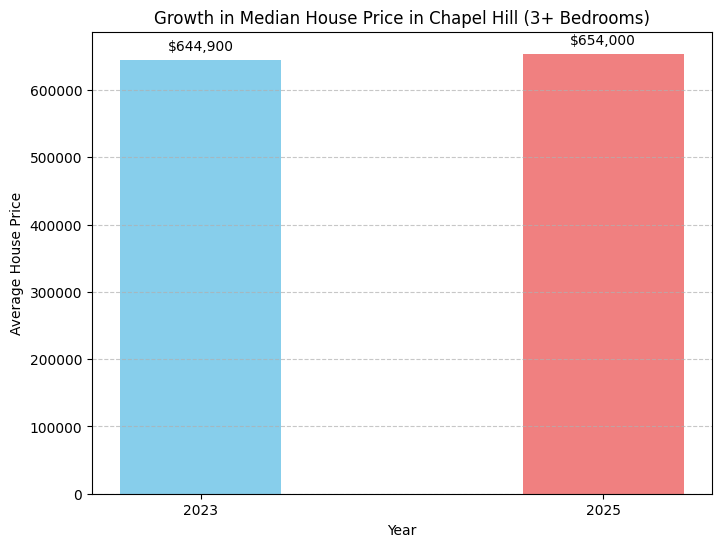

In [ ]:
import matplotlib.pyplot as plt

avg_price_2023 = df_2023_filtered['price'].median()
avg_price_2025 = df_2025_filtered['price'].median()

years = [2023, 2025]
avg_prices = [avg_price_2023, avg_price_2025]

plt.figure(figsize=(8, 6))
plt.bar(years, avg_prices, color=['skyblue', 'lightcoral'])
plt.title('Growth in Median House Price in Chapel Hill (3+ Bedrooms)')
plt.xlabel('Year')
plt.ylabel('Average House Price')
plt.xticks(years)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, price in enumerate(avg_prices):
    plt.text(years[i], price + 10000, f"${price:,.0f}", ha='center', va='bottom')

plt.show()

##Rental Income Potential on the Rise: Chapel Hill Median Rent Trends (2023-2025)

**Why this Function Matters**: This function visualizes how median rents have changed for 3+ bedroom homes in Chapel Hill between 2023 and 2025. Our stakeholder is interested in student housing income, so this is a critical KPI for them.

**What this Tells Us**: Rents have increased, and there is a growing demand for student housing. The rise in rent suggests that students are willing and able to pay more - a sign of a healthy and competitive market. Profit margins and rental yields are still attractive.

**Why This is Important to Our Stakeholder**: Median rent is growing in line or even outpacing home prices, there is a stronger income potential year-over-year. Properties that may have seemed marginal in 2023 now offer higher monthly cash flow, making them attractive investments in 2025. Investors who get in earlier can lock in lower purchase prices while still benefiting from rising rental rates.

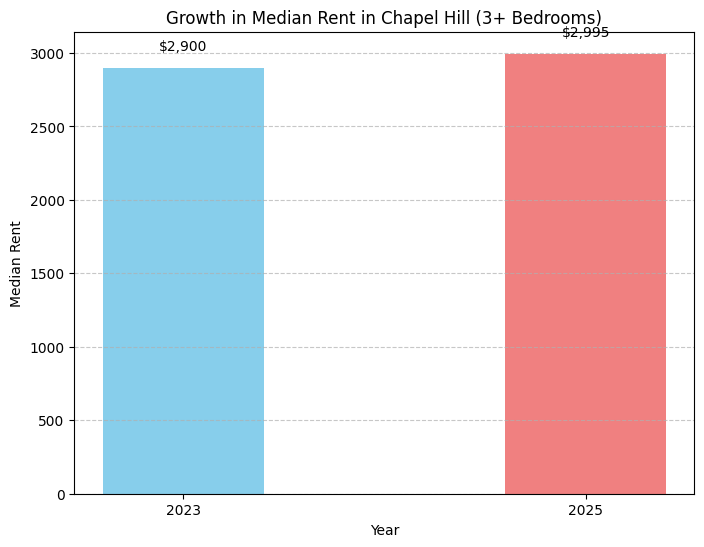

In [ ]:
import matplotlib.pyplot as plt

# Calculate median rent for 2023 and 2025
median_rent_2023 = df_2023_filtered['rentZestimate'].median()
median_rent_2025 = df_2025_filtered['rentZestimate'].median()

# Prepare data for the chart
years = [2023, 2025]
median_rents = [median_rent_2023, median_rent_2025]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(years, median_rents, color=['skyblue', 'lightcoral'])
plt.title('Growth in Median Rent in Chapel Hill (3+ Bedrooms)')
plt.xlabel('Year')
plt.ylabel('Median Rent')
plt.xticks(years)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels above each bar
for i, rent in enumerate(median_rents):
    plt.text(years[i], rent + 100, f"${rent:,.0f}", ha='center', va='bottom')

# Display the chart
plt.show()

##Measuring Rental Efficiency: Median Rent-to-Price trends for Student Housing (2023-2025)

**Why this Function Matters**: This is chef's kiss for investors because we want to look at the efficiency of investment, not just price or rent growth but how much they're getting relative to what they pay. This function calculates and visualizes the median rent-to-price ratio, a critical metric used by real estate investors to assess rental yield. It helps stakeholders determine if rental income growth is keeping pace with home price appreciation.

**What this Tells Us**: A stable or rising rent-to-price ratio, means investors are getting better returns relative to the property's cost. This lets investors assess whether they're in a high-yield market and if now is a good time to invest.

**Why This is Important to Our Stakeholder**: If the ratio remains stable or improves, it suggests the market is keeping rent competitie. This is the bottom line metric for evaluating income potential and it's a green flag for buy-and-hold strategies. Since the median rent-to-price ratio is flat at 0.46% monthly rent relative to price both years, this indicates that rent and home prices are increasing at a similar pace. Investors aren't getting more rent relative to home cost but they're not getting less either, so there's a market balance. This points to a stable yield environment for stduent rentals.

**Interpretation in Investor Terms**: For every 100,000 spent on a home, the median monthly rent was 460 in both 2023 and 2025. This means the annual rent yield is about 5.5% which is a very healthy rental yield for a low-risk, high-demand market.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate rent-to-price ratio for 2023 and 2025
df_2023_filtered['rent_price_ratio'] = df_2023_filtered['rentZestimate'] / df_2023_filtered['price']
df_2025_filtered['rent_price_ratio'] = df_2025_filtered['rentZestimate'] / df_2025_filtered['price']

# Calculate median rent-to-price ratio for each year
median_ratio_2023 = df_2023_filtered['rent_price_ratio'].median()
median_ratio_2025 = df_2025_filtered['rent_price_ratio'].median()

# Prepare data for the chart
years = [2023, 2025]
median_ratios = [median_ratio_2023, median_ratio_2025]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(years, median_ratios, color=['skyblue', 'lightcoral'])
plt.title('Median Rent-to-Price Ratio in Chapel Hill (3+ Bedrooms)')
plt.xlabel('Year')
plt.ylabel('Median Rent-to-Price Ratio')
plt.xticks(years)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels above each bar
for i, ratio in enumerate(median_ratios):
    plt.text(years[i], ratio + 0.0005, f"{ratio:.4f}", ha='center', va='bottom')

# Display the chart
plt.show()

NameError: name 'df_2023_filtered' is not defined

### Market Growth, Rent Yield, and Area Analysis

**This section of the analysis is designed to help out-of-state investors identify:**


* Where the Chapel Hill student rental market is growing between 2023 and 2025.
* Which specific areas (not just zip codes) offer strong rent potential (measured by rent yield).
* How to target areas with both high rent yield and growth in available properties.

#### Growth by zipcode

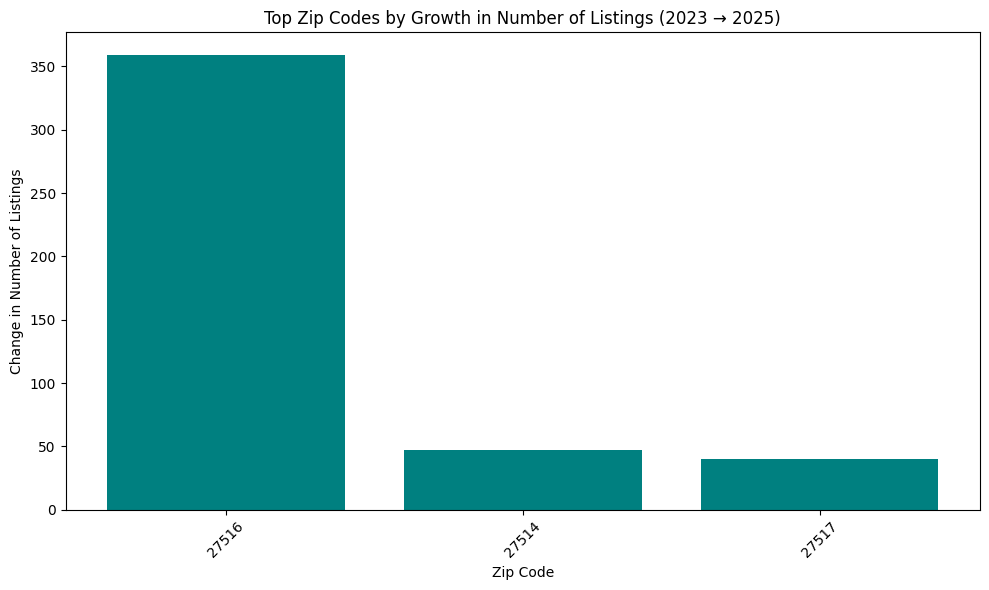

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Minimum number of listings to include a zipcode
MIN_LISTINGS = 5

# Group by zipcode for 2023
growth_2023 = df_2023_filtered.groupby('zipcode').agg(
    num_properties_2023=('zpid', 'count'),
    avg_price_2023=('price', 'mean')
).reset_index()

# Group by zipcode for 2025
growth_2025 = df_2025_filtered.groupby('zipcode').agg(
    num_properties_2025=('zpid', 'count'),
    avg_price_2025=('price', 'mean')
).reset_index()

# Merge the two summaries
growth_comparison = pd.merge(growth_2023, growth_2025, on='zipcode', how='inner')

# Filter out zip codes with too few properties in either year
growth_comparison = growth_comparison[
    (growth_comparison['num_properties_2023'] >= MIN_LISTINGS) &
    (growth_comparison['num_properties_2025'] >= MIN_LISTINGS)
]

# Calculate growth metrics
growth_comparison['property_count_change'] = growth_comparison['num_properties_2025'] - growth_comparison['num_properties_2023']
growth_comparison['price_growth_percent'] = (
    (growth_comparison['avg_price_2025'] - growth_comparison['avg_price_2023']) / growth_comparison['avg_price_2023']
) * 100

# Visualize property count change
top_growth = growth_comparison.sort_values('property_count_change', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_growth['zipcode'].astype(str), top_growth['property_count_change'], color='teal')
plt.title('Top Zip Codes by Growth in Number of Listings (2023 → 2025)')
plt.xlabel('Zip Code')
plt.ylabel('Change in Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### More specific location grouping and growth comparison

Instead of grouping properties by zip code (which was quite broad for a small town like Chapel Hill especially for our narrowed focus), this analysis uses rounded latitude and longitude coordinates to create "location groups," roughly representing small areas or clusters of properties.

* We round latitude and longitude to 3 decimal places, grouping properties that are located within approximately 100 meters of each other (a few city blocks).
* This allows us to spot micro-markets and clusters of rental opportunities — much more specific than using zip codes.

In [ ]:
from geopy.distance import geodesic
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# UNC Chapel Hill location
UNC_COORDS = (35.9049, -79.0469)

# Grouping function (using latitude and longitude rounding to find areas of about a few blocks)
def location_group_key(row):
    return f"{round(row['latitude'], 3)},{round(row['longitude'], 3)}"

# Helper to parse lat/lon back from the group key
def parse_location_group(group):
    lat, lon = map(float, group.split(","))
    return lat, lon


**What Growth Means Here:**

* Property Count Growth = Change in the number of listings in each location group from 2023 to 2025.

* Price Growth (%) = Percentage change in the average listing price within each group between 2023 and 2025.

This helps investors see which areas are getting more competitive or attracting more listings, signaling areas of market expansion.

In [ ]:
MIN_LISTINGS = 3  # minimun number of listings in an area to avoid skewing data with a single instance

# Growth for 2023
growth_2023 = df_2023_filtered.groupby(
    df_2023_filtered.apply(location_group_key, axis=1)
).agg(
    num_properties_2023=('zpid', 'count'),
    avg_price_2023=('price', 'mean')
).reset_index().rename(columns={'index': 'location_group'})

# Growth for 2025
growth_2025 = df_2025_filtered.groupby(
    df_2025_filtered.apply(location_group_key, axis=1)
).agg(
    num_properties_2025=('zpid', 'count'),
    avg_price_2025=('price', 'mean')
).reset_index().rename(columns={'index': 'location_group'})

# Merge and filter by minimum listings
growth_comparison = pd.merge(growth_2023, growth_2025, on='location_group', how='inner')
growth_comparison = growth_comparison[
    (growth_comparison['num_properties_2023'] >= MIN_LISTINGS) &
    (growth_comparison['num_properties_2025'] >= MIN_LISTINGS)
]

# Add growth calculations
growth_comparison['property_count_change'] = growth_comparison['num_properties_2025'] - growth_comparison['num_properties_2023']
growth_comparison['price_growth_percent'] = (
    (growth_comparison['avg_price_2025'] - growth_comparison['avg_price_2023']) / growth_comparison['avg_price_2023']
) * 100


**What Rent Yield Means:**

* Rent Yield = Annual Rent Income / Purchase Price

 * Calculated as:

    Rent Yield = (Rent Estimate × 12 months) / Property Price

    This tells investors how much rental income they could expect per year as a percentage of the purchase price.

For example:

A 6% rent yield means that an investor could expect to make back 6% of the property's purchase price each year from rent, before expenses like maintenance, taxes, or vacancies.

In [ ]:
# Rent yield calculation (add rent_yield directly, no rounding columns)
df_2023_filtered = df_2023_filtered.copy()
df_2023_filtered['rent_yield'] = (df_2023_filtered['rentZestimate'] * 12) / df_2023_filtered['price']

df_2025_filtered = df_2025_filtered.copy()
df_2025_filtered['rent_yield'] = (df_2025_filtered['rentZestimate'] * 12) / df_2025_filtered['price']


# Group yields
yield_2023 = df_2023_filtered.groupby(
    df_2023_filtered.apply(location_group_key, axis=1)
).agg(
    avg_rent_yield_2023=('rent_yield', 'mean'),
    count_2023=('zpid', 'count')
).reset_index().rename(columns={'index': 'location_group'})
yield_2023 = yield_2023[yield_2023['count_2023'] >= MIN_LISTINGS]

yield_2025 = df_2025_filtered.groupby(
    df_2025_filtered.apply(location_group_key, axis=1)
).agg(
    avg_rent_yield_2025=('rent_yield', 'mean'),
    count_2025=('zpid', 'count')
).reset_index().rename(columns={'index': 'location_group'})
yield_2025 = yield_2025[yield_2025['count_2025'] >= MIN_LISTINGS]

# Merge growth and yield together
insight_table = pd.merge(growth_comparison, yield_2025[['location_group', 'avg_rent_yield_2025']], on='location_group', how='inner')


#### Map showing growth and rent yield in location clusters


Blue circles on the map represent groups of properties located close together.

When clicking on a marker, the popup shows:

* The number of properties in 2023 and 2025.

* The change in listing counts (market growth).

* The average price growth (appreciation).

* The average rent yield in 2025 (investment return potential).

In [ ]:
# Create the map centered on UNC
map_growth_yield = folium.Map(location=UNC_COORDS, zoom_start=15)
marker_cluster = MarkerCluster().add_to(map_growth_yield)

# Add markers with popup details
for idx, row in insight_table.iterrows():
    lat, lon = parse_location_group(row['location_group'])
    popup_text = f"""
    Properties 2023: {row['num_properties_2023']}<br>
    Properties 2025: {row['num_properties_2025']}<br>
    Change in Listings: {row['property_count_change']}<br>
    Price Growth: {row['price_growth_percent']:.2f}%<br>
    Average Rent Yield (2025): {row['avg_rent_yield_2025']:.2%}
    """
    folium.CircleMarker(
        location=[lat, lon],
        radius=7,
        popup=popup_text,
        color='darkblue',
        fill=True,
        fill_opacity=0.7
    ).add_to(marker_cluster)

# Display the map in the notebook
display(map_growth_yield)


##### Color gradient based on average 2025 rent yield

In [ ]:
import numpy as np
import branca.colormap as cm

# Calculate percentiles to avoid extreme outliers dominating the color scale
lower_bound = np.percentile(insight_table['avg_rent_yield_2025'], 5)
upper_bound = np.percentile(insight_table['avg_rent_yield_2025'], 95)

colormap = cm.LinearColormap(
    colors=['red', 'yellow', 'green'],
    vmin=lower_bound,
    vmax=upper_bound,
    caption='Average Rent Yield (2025)'
)


Scaling Marker Color by Rent Yield:
The marker color is set using a red-yellow-green color gradient:

  🔴 Red = lower yield (less attractive investment).

  🟡 Yellow = mid-range yield.

  🟢 Green = higher yield (better rental return).

Using Percentile-Based Scaling:
Instead of using raw min/max rent yield (which could be skewed by outliers), the color gradient is scaled between the 5th and 95th percentiles of rent yield values.
This ensures that:

* The color differences remain meaningful.

* The map is not distorted by a few extreme values.

Adding a Legend for Clarity:
A color scale legend is included directly on the map so viewers can easily interpret what the color gradient represents.

In [ ]:
import numpy as np
import branca.colormap as cm
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Calculate 5th and 95th percentiles to avoid extreme outlier distortion
lower_bound = np.percentile(insight_table['avg_rent_yield_2025'], 5)
upper_bound = np.percentile(insight_table['avg_rent_yield_2025'], 95)

# Define color scale
colormap = cm.LinearColormap(
    colors=['red', 'yellow', 'green'],
    vmin=lower_bound,
    vmax=upper_bound,
    caption='Average Rent Yield (2025)'
)

# Clip function to keep values within color scale limits
def clip_value(value, vmin, vmax):
    return max(vmin, min(value, vmax))

# Create the map centered on UNC
map_growth_yield = folium.Map(location=UNC_COORDS, zoom_start=15)
marker_cluster = MarkerCluster().add_to(map_growth_yield)

# Loop through your insight_table to add markers
for idx, row in insight_table.iterrows():
    lat, lon = parse_location_group(row['location_group'])
    popup_text = f"""
    Properties 2023: {row['num_properties_2023']}<br>
    Properties 2025: {row['num_properties_2025']}<br>
    Change in Listings: {row['property_count_change']}<br>
    Price Growth: {row['price_growth_percent']:.2f}%<br>
    Average Rent Yield (2025): {row['avg_rent_yield_2025']:.2%}
    """

    # Clip rent yield to prevent outliers from messing up color scaling
    clipped_yield = clip_value(row['avg_rent_yield_2025'], lower_bound, upper_bound)
    color = colormap(clipped_yield)

    # Add marker to the map
    folium.CircleMarker(
        location=[lat, lon],
        radius=7,
        popup=popup_text,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(marker_cluster)

# Add the color legend to the map
colormap.add_to(map_growth_yield)

# Display the map
display(map_growth_yield)


## Rent Yield and Market Growth Map

This interactive map provides a data-driven tool for identifying high-potential areas for student rental investment near UNC Chapel Hill. It combines two key indicators that matter most for investors evaluating rental properties:

* Rental Return Potential (Rent Yield) — visualized through marker color.

* Market Growth (either Listing Growth or Price Growth) — visualized through marker size.

By integrating both indicators into a single view, this map allows investors to make smarter, faster, and more confident decisions about where to focus their attention and capital.

**How to Read This Map:**

The color of each circle represents the average rent yield for that area, with red indicating lower yields and green indicating higher yields. This allows investors to easily identify which neighborhoods offer the strongest rental income potential relative to property prices.

The size of each circle shows how much that area has grown between 2023 and 2025. Stakeholders can choose to view either growth in the number of listings (which indicates increased market activity and interest) or price growth percentage (which signals rising property values and appreciation potential). The dropdown toggle allows switching between these two views so that the investor can explore different growth strategies.

When a user clicks on a circle, the popup displays key details about that specific area: how many properties were listed in 2023 and 2025, the change in the number of listings, price growth percentage, and the average rent yield.

In [ ]:
import numpy as np
import branca.colormap as cm
import folium
from folium.plugins import MarkerCluster
from IPython.display import display
import ipywidgets as widgets

# ------------------------------
# Color Gradient (Rent Yield)
# ------------------------------
lower_bound = np.percentile(insight_table['avg_rent_yield_2025'], 5)
upper_bound = np.percentile(insight_table['avg_rent_yield_2025'], 95)

colormap = cm.LinearColormap(
    colors=['red', 'yellow', 'green'],
    vmin=lower_bound,
    vmax=upper_bound,
    caption='Average Rent Yield (2025): Red = Low Yield, Green = High Yield'
)

def clip_value(value, vmin, vmax):
    return max(vmin, min(value, vmax))

# ------------------------------
# Radius Scaling Functions
# ------------------------------
def scale_radius_growth(change):
    max_growth = insight_table['property_count_change'].abs().max()
    return max(4, min(18, (abs(change) / max_growth) * 18))

def scale_radius_price_growth(price_growth):
    max_price_growth = insight_table['price_growth_percent'].abs().max()
    return max(4, min(18, (abs(price_growth) / max_price_growth) * 18))

# ------------------------------
# Map Rendering Function with Toggle
# ------------------------------
def create_map(size_metric):
    # Create the map
    map_growth_yield = folium.Map(location=UNC_COORDS, zoom_start=15)
    marker_cluster = MarkerCluster().add_to(map_growth_yield)

    # Add circle markers
    for idx, row in insight_table.iterrows():
        lat, lon = parse_location_group(row['location_group'])
        popup_text = f"""
        <b>Properties 2023:</b> {row['num_properties_2023']}<br>
        <b>Properties 2025:</b> {row['num_properties_2025']}<br>
        <b>Change in Listings:</b> {row['property_count_change']}<br>
        <b>Price Growth:</b> {row['price_growth_percent']:.2f}%<br>
        <b>Average Rent Yield (2025):</b> {row['avg_rent_yield_2025']:.2%}
        """
        clipped_yield = clip_value(row['avg_rent_yield_2025'], lower_bound, upper_bound)
        color = colormap(clipped_yield)

        # Determine radius based on selected metric
        if size_metric == 'Listing Growth':
            radius = scale_radius_growth(row['property_count_change'])
        else:  # Price Growth
            radius = scale_radius_price_growth(row['price_growth_percent'])

        folium.CircleMarker(
            location=[lat, lon],
            radius=radius,
            popup=popup_text,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7
        ).add_to(marker_cluster)

    # Add color scale legend
    colormap.add_to(map_growth_yield)

    # Custom size legend (depends on toggle choice)
    size_legend = f'''
    <div style="
        position: fixed;
        bottom: 50px;
        left: 50px;
        width: 250px;
        height: 90px;
        background-color: white;
        border:2px solid grey;
        z-index:9999;
        font-size:14px;
        padding: 10px;
        ">
        <b>Map Legend:</b><br>
        <i style="background:green; color:white; padding:2px 4px; border-radius:3px;">Color = Rent Yield (2025)</i><br>
        <i>Size = {size_metric}</i><br>
        Larger circles = higher {size_metric.lower()}.
    </div>
    '''
    map_growth_yield.get_root().html.add_child(folium.Element(size_legend))

    return map_growth_yield

# ------------------------------
# Interactive Toggle Widget
# ------------------------------
size_metric_dropdown = widgets.Dropdown(
    options=['Listing Growth', 'Price Growth'],
    value='Listing Growth',
    description='Size Metric:',
    style={'description_width': 'initial'}
)

def update_map(size_metric):
    display(create_map(size_metric))

widgets.interact(update_map, size_metric=size_metric_dropdown);


interactive(children=(Dropdown(description='Size Metric:', options=('Listing Growth', 'Price Growth'), style=D…

**Why This Visualization Matters:**

This map helps investors quickly spot Chapel Hill neighborhoods where properties are not only currently profitable to rent but also located in areas showing strong signs of market momentum. Areas with high rent yields and strong growth may represent the best opportunities for a balance of short-term rental income and long-term value appreciation.

By using this map, investors can avoid wasting time on areas with low yields or declining market activity and instead focus their attention on where the student rental market is expanding and where their investment is likely to perform best.

This visualization simplifies complex real estate data and makes key insights immediately accessible, supporting better, data-informed investment decisions.

**What This Tells Us:**

The map highlights key areas of opportunity (and caution) for out-of-state investors looking to purchase student rental properties near UNC Chapel Hill.

We observe that the larger circle around the central downtown area represents a significant increase in listings, indicating strong market activity and investor interest. However, this area is colored red on the map, signaling that despite the growth in listings, the average rent yield is relatively low. This suggests that properties in the downtown core may be overpriced relative to the rental income they can generate, reducing the overall return on investment (ROI) for rental-focused buyers.

In contrast, the area around Lindsay Street and Cotton Street, near Hargraves Park, stands out as a highly promising opportunity. This area is represented by a large green circle — the size indicating notable growth in listings (from 4 properties in 2023 to 13 in 2025), and the green color reflecting a strong rent yield of approximately 7.5%. This combination of growth and yield suggests that this neighborhood offers both current profitability from rental income and growing market momentum.

A little further south, near Creel Street off of Merritt Mill Road, we identify another attractive investment target. This cluster grew from 6 listings in 2023 to 14 in 2025 and shows an even higher rent yield of 8.07%. Importantly, this area is also surrounded by smaller green circles, indicating that nearby neighborhoods are also performing well in terms of rental returns. This clustering of high-yield areas could signal broader neighborhood appeal and stability for student rentals.

**Takeaways for Investors:**

These findings suggest that while central downtown Chapel Hill remains active, some of the strongest opportunities for student rental investment may lie just outside the core in areas where listing growth is paired with healthy rent yields. Neighborhoods like those near Hargraves Park and Creel Street may offer investors a better balance of affordability, rental demand, and potential for appreciation, making them well-suited for out-of-state buyers seeking reliable rental income.